<a href="https://colab.research.google.com/github/rohitarer/PRODIGY_ML_04/blob/main/PRODIGY_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zipfile import ZipFile

In [4]:
with ZipFile('drive/MyDrive/archive.zip', 'r') as zipObj:
  zipObj.extractall('drive/MyDrive/leapGestRecog')

In [13]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt




In [14]:
# Define the path to the dataset
data_path = '/content/drive/MyDrive/leapGestRecog/leapgestrecog/leapGestRecog'

In [15]:
# Initialize lists to hold the images and labels
images = []
labels = []

In [16]:
# Function to list contents of a directory
def list_dir(path):
    print(f"Contents of {path}:")
    for item in os.listdir(path):
        print(f"  {item}")

In [17]:
# List main directory contents
list_dir(data_path)

Contents of /content/drive/MyDrive/leapGestRecog/leapgestrecog/leapGestRecog:
  00
  01
  02
  03
  04
  05
  06
  07
  08
  09


In [18]:
# Load the images and labels
for directory in os.listdir(data_path):
    dir_path = os.path.join(data_path, directory)
    if os.path.isdir(dir_path) and directory.startswith('0'):  # Ensure it's a directory and skip hidden files
        print(f"Processing directory: {directory}")
        list_dir(dir_path)  # List the contents of this directory
        for gesture_dir in os.listdir(dir_path):
            gesture_path = os.path.join(dir_path, gesture_dir)
            if os.path.isdir(gesture_path):
                print(f"  Processing gesture directory: {gesture_dir}")
                list_dir(gesture_path)  # List the contents of this gesture directory
                for image_file in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, image_file)
                    if img_path.endswith('.png'):  # Check if the file is an image
                        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if image is not None:
                            image = cv2.resize(image, (64, 64))
                            images.append(image)
                            labels.append(gesture_dir)
                        else:
                            print(f"Warning: Unable to read image '{img_path}'")
            else:
                print(f"Warning: '{gesture_path}' is not a directory")
    else:
        print(f"Warning: '{dir_path}' is not a directory or does not start with '0'")

Streaming output truncated to the last 5000 lines.
  frame_07_06_0073.png
  frame_07_06_0074.png
  frame_07_06_0075.png
  frame_07_06_0076.png
  frame_07_06_0077.png
  frame_07_06_0078.png
  frame_07_06_0079.png
  frame_07_06_0080.png
  frame_07_06_0081.png
  frame_07_06_0082.png
  frame_07_06_0083.png
  frame_07_06_0084.png
  frame_07_06_0085.png
  frame_07_06_0086.png
  frame_07_06_0087.png
  frame_07_06_0088.png
  frame_07_06_0089.png
  frame_07_06_0090.png
  frame_07_06_0091.png
  frame_07_06_0092.png
  frame_07_06_0093.png
  frame_07_06_0094.png
  frame_07_06_0095.png
  frame_07_06_0096.png
  frame_07_06_0097.png
  frame_07_06_0098.png
  frame_07_06_0099.png
  frame_07_06_0100.png
  frame_07_06_0101.png
  frame_07_06_0102.png
  frame_07_06_0103.png
  frame_07_06_0104.png
  frame_07_06_0105.png
  frame_07_06_0106.png
  frame_07_06_0107.png
  frame_07_06_0108.png
  frame_07_06_0109.png
  frame_07_06_0110.png
  frame_07_06_0111.png
  frame_07_06_0112.png
  frame_07_06_0113.png
  fram

In [19]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [20]:
# Check if images and labels are loaded correctly
if images.size == 0 or labels.size == 0:
    raise ValueError("No images or labels found. Check the dataset path and structure.")
else:
    print(f"Loaded {images.shape[0]} images and {labels.shape[0]} labels")

Loaded 20000 images and 20000 labels


In [21]:
# Normalize the images
images = images / 255.0

In [22]:
# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [24]:
# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

In [25]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [26]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [27]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
500/500 [==============================] - 16s 30ms/step - loss: 0.9584 - accuracy: 0.6616 - val_loss: 0.1524 - val_accuracy: 0.9438
Epoch 2/50
500/500 [==============================] - 15s 29ms/step - loss: 0.2377 - accuracy: 0.9207 - val_loss: 0.0198 - val_accuracy: 0.9987
Epoch 3/50
500/500 [==============================] - 14s 28ms/step - loss: 0.1418 - accuracy: 0.9534 - val_loss: 0.0291 - val_accuracy: 0.9930
Epoch 4/50
500/500 [==============================] - 14s 28ms/step - loss: 0.1048 - accuracy: 0.9665 - val_loss: 0.0078 - val_accuracy: 0.9975
Epoch 5/50
500/500 [==============================] - 15s 29ms/step - loss: 0.0840 - accuracy: 0.9730 - val_loss: 0.0031 - val_accuracy: 0.9990
Epoch 6/50
500/500 [==============================] - 14s 29ms/step - loss: 0.0639 - accuracy: 0.9796 - val_loss: 0.0255 - val_accuracy: 0.9912
Epoch 7/50
500/500 [==============================] - 14s 28ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 0.0034 - val_accuracy:

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

125/125 [==============================] - 1s 8ms/step - loss: 0.0015 - accuracy: 0.9992
Test accuracy: 99.92%


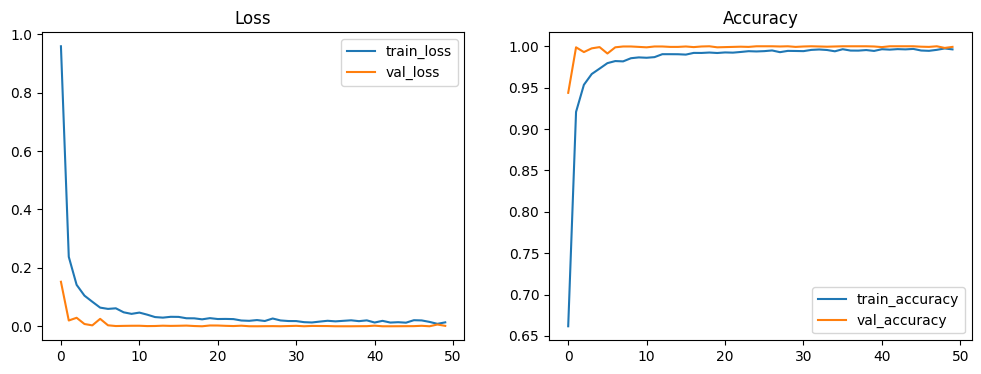

In [29]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()